In [44]:
pip install backtrader


In [52]:
import yfinance as yf
import backtrader as bt


In [53]:
# Define the strategy
class SimpleMovingAverageStrategy(bt.Strategy):
    params = (('sma_period', 50),)

    def __init__(self):
        self.sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.sma_period)

    def next(self):
        if self.data.close > self.sma:
            # Buy signal
            self.buy()
        elif self.data.close < self.sma:
            # Sell signal
            self.sell()

# Download historical data using yfinance
ticker = "EUR=X"
data = yf.download(ticker, start="2023-01-01", end="2024-12-31")


[*********************100%%**********************]  1 of 1 completed


In [54]:
# Convert data to Backtrader format
data = bt.feeds.PandasData(dataname=data)

# Create a Backtrader Cerebro engine
cerebro = bt.Cerebro()

# Add the data to the engine
cerebro.adddata(data)

# Add the strategy to the engine
cerebro.addstrategy(SimpleMovingAverageStrategy)

# Set the initial cash amount for backtesting
cerebro.broker.set_cash(100000)

In [55]:
# Print the starting cash amount
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the backtest
cerebro.run()

# Print the final cash amount
print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Ending Portfolio Value: 99998.14


<IPython.core.display.Javascript object>


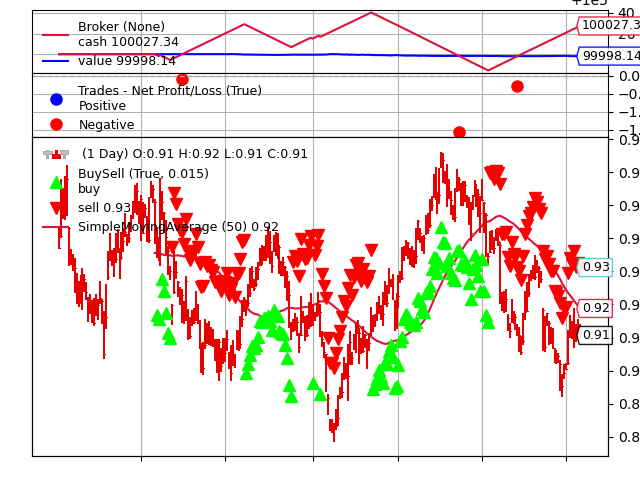

[[<Figure size 640x480 with 4 Axes>]]

In [56]:
# Plot the performance
cerebro.plot(style='candlestick')  # You can customize the plot style as needed